<h1>Capstone Project</h1>

<h2>Stock Prediction Using Twitter Sentiment Analysis</h2>

### Load the datatset

In [93]:
import pandas as pd

fname = open('finalData.csv', 'r')
df = pd.read_csv(fname)
df.head()

,S.no.,Date,Open,High,Low,Close,neg,pos
0,0,2009-06-18,8496.73,8590.52,8475.12,8555.60,0.6436,0.3564
1,1,2009-06-19,8556.96,8616.59,8496.73,8539.73,0.6369,0.3631
2,2,2009-06-20,8547.74,8577.71,8415.64,8439.37,0.6488,0.3512
3,3,2009-06-21,8543.13,8558.27,8375.09,8389.19,0.6476,0.3524
4,4,2009-06-22,8538.52,8538.83,8334.55,8339.01,0.6476,0.3524


In [94]:
'''
make the train and testing dataset.
'''
train_df = df[:int(len(df)*0.8)]
test_df = df[int(len(df)*0.8):]

In [95]:
train_df.loc[1]['Low']

8496.7299999999996

In [96]:
def build_set(t_df):
    count = len(t_df)
    data_row = {'Date':[], 'Open':[], 'High': [], 'Low':[], 'Close':[], 'neg': [], 'pos': [], 'target': []}
    for i in range(count-1):
        data_row['Date'].append(t_df.loc[i]['Date'])
        data_row['Open'].append(t_df.loc[i]['Open'])
        data_row['High'].append(t_df.loc[i]['High'])
        data_row['Low'].append(t_df.loc[i]['Low'])
        data_row['Close'].append(t_df.loc[i]['Close'])
        data_row['neg'].append(t_df.loc[i]['neg'])
        data_row['pos'].append(t_df.loc[i]['pos'])
        data_row['target'].append(t_df.loc[i+1]['Close'])
    
#     return data_row
    final_df = pd.DataFrame.from_dict(data=data_row,orient='columns', dtype=None)
    return final_df

In [97]:
train_data = build_set(train_df)
train_data.head()

,Close,Date,High,Low,Open,neg,pos,target
0,8555.60,2009-06-18,8590.52,8475.12,8496.73,0.6436,0.3564,8539.73
1,8539.73,2009-06-19,8616.59,8496.73,8556.96,0.6369,0.3631,8439.37
2,8439.37,2009-06-20,8577.71,8415.64,8547.74,0.6488,0.3512,8389.19
3,8389.19,2009-06-21,8558.27,8375.09,8543.13,0.6476,0.3524,8339.01
4,8339.01,2009-06-22,8538.83,8334.55,8538.52,0.6476,0.3524,8322.91


In [98]:
train_targets = train_data['target']
train_data_labels = train_data.drop(['Date' ,'target'], axis=1)
train_data_labels.head()

,Close,High,Low,Open,neg,pos
0,8555.60,8590.52,8475.12,8496.73,0.6436,0.3564
1,8539.73,8616.59,8496.73,8556.96,0.6369,0.3631
2,8439.37,8577.71,8415.64,8547.74,0.6488,0.3512
3,8389.19,8558.27,8375.09,8543.13,0.6476,0.3524
4,8339.01,8538.83,8334.55,8538.52,0.6476,0.3524


### Treating it as a supervised classification problem

In [99]:
for index, row in train_data.iterrows():
    if row['target'] > row['Close']:
        train_data.ix[index, 'target'] = 1
    else:
        train_data.ix[index, 'target'] = 0

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """


In [100]:
train_data.head()

,Close,Date,High,Low,Open,neg,pos,target
0,8555.60,2009-06-18,8590.52,8475.12,8496.73,0.6436,0.3564,0.0
1,8539.73,2009-06-19,8616.59,8496.73,8556.96,0.6369,0.3631,0.0
2,8439.37,2009-06-20,8577.71,8415.64,8547.74,0.6488,0.3512,0.0
3,8389.19,2009-06-21,8558.27,8375.09,8543.13,0.6476,0.3524,0.0
4,8339.01,2009-06-22,8538.83,8334.55,8538.52,0.6476,0.3524,0.0


In [101]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=3)
clf.fit(train_data_labels, train_targets)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=3, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [102]:
clf.predict(train_data_labels.iloc[0])

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1.])

In [103]:
clf.n_iter_

array([10], dtype=int32)

In [154]:
test_df.index = range(len(test_df))
# test_df.head()
test_data = build_set(test_df)
test_targets = test_data['target']
test_data_labels = test_data.drop(['Date' ,'target'], axis=1)
test_data_labels.head()

,Close,High,Low,Open,neg,pos
0,10246.97,10260.80,10197.69,10223.01,0.6494,0.3506
1,10291.26,10341.97,10246.14,10247.42,0.6335,0.3665
2,10197.47,10321.64,10171.24,10289.82,0.6495,0.3505
3,10270.47,10305.69,10192.03,10197.85,0.6869,0.3131
4,10338.72,10369.97,10229.74,10232.84,0.6549,0.3451


In [158]:
for index, row in test_data.iterrows():
    if row['target'] > row['Close']:
        test_data.ix[index, 'target'] = 1
    else:
        test_data.ix[index, 'target'] = 0

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


In [159]:
lgr_score = clf.score(test_data_labels, test_targets)
print("The Logistic Regression return an accuracy of {:.2f}%".format(lgr_score*100))

The Logistic Regression return an accuracy of 63.89%


Confusion matrix, without normalization
[[ 1 12]
 [ 1 22]]
Normalized confusion matrix
[[ 0.08  0.92]
 [ 0.04  0.96]]


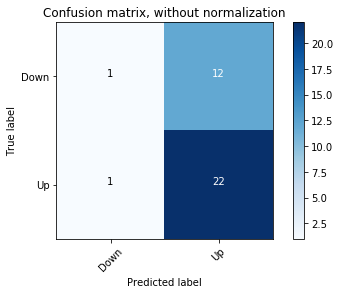

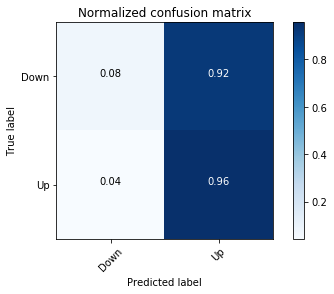

In [190]:
'''
Making confusion matrix
'''

import numpy as np
import matplotlib.pyplot as plt
import itertools

test_pred = pd.Series(0, index=np.arange(len(test_targets)))
for index, row in test_data_labels.iterrows():
    test_pred[index] = float(clf.predict(row.values.reshape(1, -1)))
#     print("Target: {} and Prediction: {:.1f}".format(test_targets[index], test_pred[index])) 

test_pred = np.array(test_pred)
test_targets = np.array(test_targets)
from sklearn.metrics import confusion_matrix
# confusion_matrix(test_targets, test_pred)

class_names = ['Down', 'Up']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
cnf_matrix = confusion_matrix(test_targets, test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [109]:
from sklearn import svm
svm_clf = svm.SVC(kernel='rbf',decision_function_shape='ovo', random_state=3)
svm_clf.fit(train_data_labels, train_targets)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=3, shrinking=True,
  tol=0.001, verbose=False)

In [110]:
svm_score = svm_clf.score(test_data_labels, test_targets)
print("The SVM(kernel=rbf) an accuracy of {:.2f}%".format(svm_score*100))

The SVM(kernel=rbf) an accuracy of 63.89%


In [111]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, loss='perceptron')
sgd_clf.fit(train_data_labels, train_targets)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='perceptron', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [112]:
sgd_score = sgd_clf.score(test_data_labels, test_targets)
print("The SGDClassifier an accuracy of {:.2f}%".format(sgd_score*100))

The SGDClassifier an accuracy of 63.89%


### Using Regressor

In [113]:
train_data = build_set(train_df)
train_targets = train_data['target']
train_data_labels = train_data.drop(['Date' ,'target'], axis=1)
train_data_labels.head()

,Close,High,Low,Open,neg,pos
0,8555.60,8590.52,8475.12,8496.73,0.6436,0.3564
1,8539.73,8616.59,8496.73,8556.96,0.6369,0.3631
2,8439.37,8577.71,8415.64,8547.74,0.6488,0.3512
3,8389.19,8558.27,8375.09,8543.13,0.6476,0.3524
4,8339.01,8538.83,8334.55,8538.52,0.6476,0.3524


In [114]:
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor

en = ElasticNet(alpha=0.1, l1_ratio=0.6, random_state=3)
lasso = Lasso(alpha=0.7, random_state=3)
rfr = RandomForestRegressor(random_state=3)

en.fit(train_data_labels, train_targets)
lasso.fit(train_data_labels, train_targets)
rfr.fit(train_data_labels, train_targets)
print("Successfully trained Lasso, ElasticNet and RandomForestRegressor on the training set.")

Successfully trained Lasso, ElasticNet and RandomForestRegressor on the training set.


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [115]:
en_pred = []
en_pval = []
rfr_pred = []
rfr_pval = []
lasso_pred = []
lass_pval = []
for index, row in test_data_labels.iterrows():
    e_p = en.predict(row.values.reshape(1, -1))
    l_p = lasso.predict(row.values.reshape(1, -1))
    r_p = rfr.predict(row.values.reshape(1, -1))
    
#     print(p[0])
    en_pval.append(e_p[0])
    lass_pval.append(l_p[0])
    rfr_pval.append(r_p[0])
    en_pred.append(e_p[0]>row['Close'])
    lasso_pred.append(l_p[0]>row['Close'])
    rfr_pred.append(r_p[0]>row['Close'])    

In [116]:
from sklearn.metrics import accuracy_score

en_score = accuracy_score(test_targets, en_pred)
lasso_score = accuracy_score(test_targets, lasso_pred)
rfr_score = accuracy_score(test_targets, rfr_pred)

print("ElasticNet regression returns an accuracy of {:.2f}%\nLasso regression gives an accuracy of {:.2f}%\nRandomForest gives an accuracy of {:.2f}%".format(en_score*100, lasso_score*100, rfr_score*100))

ElasticNet regression returns an accuracy of 55.56%
Lasso regression gives an accuracy of 55.56%
RandomForest gives an accuracy of 36.11%


## Conclusions
The result of different approaches and estimators can be concludes in terms of accuracy rate as below:


| S.no. | Approach type  | Method used         | Accuracy |
|-------|----------------|---------------------|----------|
|  1    | Classification | Logistic Regression | 63.89%   |
|  2    | Classification | SVM(kernel='rbf') | 63.89%   |
|  3    | Classification | SGDClassifier | 63.89% | 
|4| Regression | Lasso | 55.56% |
|5| Regression | ElasticNet | 55.56% |
|6| Regression | RandomForest | 36.11% | 

Hence, we can conclude that all classification approaches gives us the best accuracy for our data which happens to be 63.89%